# Expanding Services to New Non - Human Creatures on Boran and Radan
## MSDS 5013 - Final Project
#### Best Project Group  - Mohab : Nasarin : Andrew


# Introduction

We Best Project Group were hired as new data sceintest for the Planetary BestHealthCare Insurance Company Incorporated (PHBCICI). PHBCICI is interested in explandung their service to new non-human creatures on newly discovered planets Boran and Radan. We were given a small data set to perform initila expiraments on while we wait for the source data to be reviewed and verified. The data include the number of earth years of life for each alien creature, and several medical diagnostics taken 6-months prior to the alien’s death. We used SQL and Python for our analysis. 

# Python Libraries Used for Analysis

In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy.stats as st
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from mlxtend.plotting import plot_linear_regression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from PIL import Image

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'mlxtend'

# SQL Work - Extracting Data

![title](img/SQLTable.png)

# Exploratory Data Analysis

In [8]:
df = pd.read_csv('C:/Users/nasar/Downloads/draft-master/draft-master/final_table.csv')

In [9]:
df.head()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
0,41989,191.853108,102.544295,141.588776,119.807890,0.988849,1,76.957462
1,52846,102.358126,67.553652,79.661518,76.770712,0.978181,2,80.076495
2,15997,105.261325,69.054878,83.569586,80.149531,1.032715,2,86.508208
3,8248,189.628666,90.167716,139.689556,118.206986,0.972132,1,74.242965
4,83944,199.378675,143.205239,148.036310,125.230959,1.045336,1,86.055427


In [10]:
df.describe()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,51279.300000,148.557434,79.259067,112.199544,99.571505,1.000000,1.500000,80.318250
std,30687.131383,46.172740,56.579986,33.148025,23.002214,0.076767,0.504219,8.643190
min,5231.000000,94.041680,2.288449,63.736353,65.268810,0.819985,1.000000,59.481521
25%,21306.750000,103.964557,35.458756,82.640210,79.199299,0.948430,1.000000,74.785961
50%,48646.000000,139.775917,67.698476,105.163780,94.602997,1.007066,1.500000,80.394206
75%,84009.000000,195.068280,106.108790,145.366810,122.531662,1.057895,2.000000,85.774582
max,95788.000000,209.973069,228.903939,160.599282,133.964778,1.149808,2.000000,99.544450


In [11]:
df.planet_id.replace(1, 
           "boran", 
           inplace=True)
df.planet_id.replace(2, 
           "radan", 
           inplace=True)

In [9]:
df.head()

,patient_id,blood_pressure,exercise,weight,glucose,bmi,planet_id,age
0,41989,191.853108,102.544295,141.588776,119.807890,0.988849,boran,76.957462
1,52846,102.358126,67.553652,79.661518,76.770712,0.978181,radan,80.076495
2,15997,105.261325,69.054878,83.569586,80.149531,1.032715,radan,86.508208
3,8248,189.628666,90.167716,139.689556,118.206986,0.972132,boran,74.242965
4,83944,199.378675,143.205239,148.036310,125.230959,1.045336,boran,86.055427


In [12]:
age_boran = df['age'][df['planet_id'] == 'boran']
age_radan = df['age'][df['planet_id'] == 'radan']

In [17]:
#age_boran.mean(), age_boran.median(), age_radan.mean(), age_radan.median()

# Analysis
# Generate plots for the histogramage distribution for each planet - Part 1
##### What is the mean (average) life expectance of the creatures on each planet? - Part 2
 The Average life expectancy of the creatures on Boran is 76.4, and Randan is 84.2. 
##### What is the probability of a creature living past the mean life expectancy on each planet? - Part 3
 There is a 50% creatures on Boran will live past the mean life expectancy and 62% for Radan

##### Creating the histogram plots - Part 1

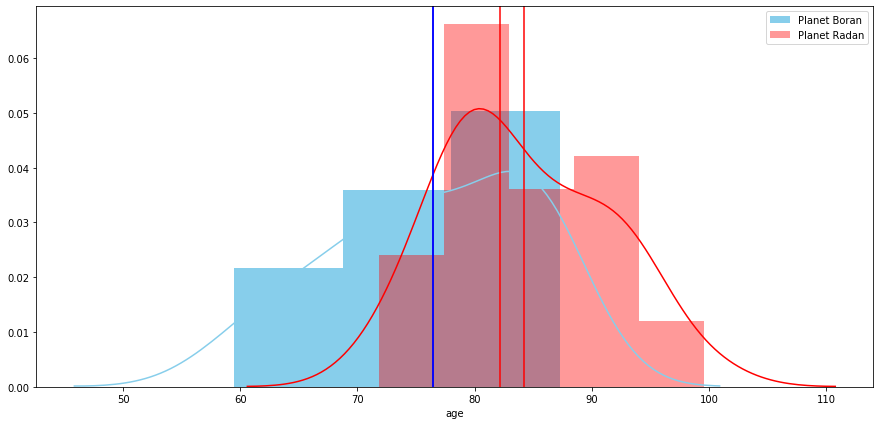

In [21]:
import seaborn as sns
plt.figure(figsize=(15,7))

sns.distplot( age_boran , color="skyblue", label="Planet Boran", hist_kws=dict(alpha=1))
sns.distplot( age_radan , color="red", label="Planet Radan")
plt.legend()
plt.axvline(age_boran.mean(), color = 'b')
plt.axvline(age_radan.mean(), color = 'r')
plt.axvline(age_boran.median(), color = 'b')
plt.axvline(age_radan.median(), color = 'r')


##### Calculating average and median - Part 2

In [22]:
mean_median = pd.DataFrame({'mean':[age_boran.mean(), age_radan.mean()], 'median':[age_boran.median(), age_radan.median()]})
mean_median.insert(0, "Planet",['boran', 'radan'], True)
mean_median.set_index('Planet')
mean_median

,Planet,mean,median
0,boran,76.419431,76.447460
1,radan,84.217069,82.166353


##### Calculating life expectancy probability - Part 3

In [23]:
def proba(data):
    num = data.median()
    avg = data.mean()
    std = data.std()
    z_score = (num - avg) / std
    probability = round((1 - st.norm.cdf(z_score))*100)
    return probability, print(str(probability) + ' %')
proba(age_boran), proba(age_radan)

50.0 %
62.0 %


((50.0, None), (62.0, None))

# Boxplot for blood pressure for each planet, describe these two plots.

The blood pressure on Boran is significantly higher than Radan. Boran is positively skewed while Radan seems to have a relatively normal distribution. Both have some outliers on the upper and lower quartiles.  

Text(0.5, 1.0, 'Blood Pressure range spread')

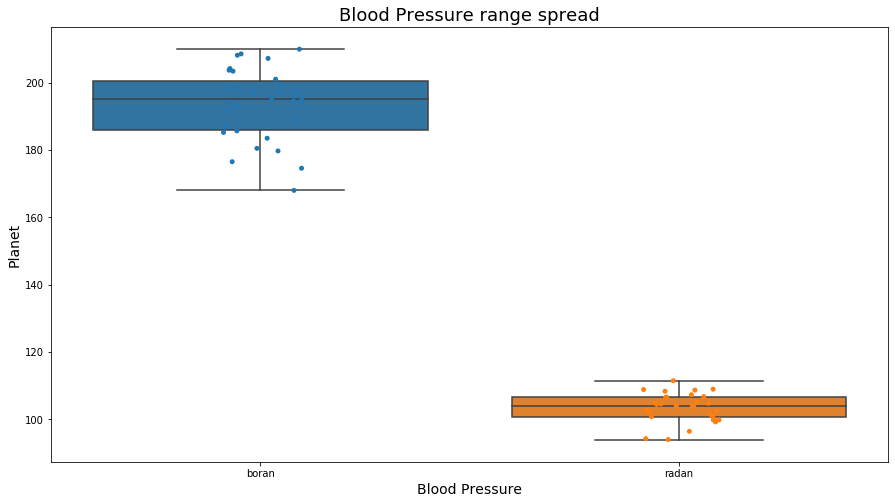

In [24]:
plt.figure(figsize=(15,8))

sns.boxplot(x=df.planet_id, y=df.blood_pressure, data=df)
sns.stripplot(x=df.planet_id, y=df.blood_pressure, data=df)
plt.ylabel("Planet", size=14)
plt.xlabel("Blood Pressure", size=14)
plt.title("Blood Pressure range spread", size=18)


# Assume that blood pressure is outcome variable, all others are independent variables. 
### Using scatter plot between blood pressure and the following variables, using planet_id as colors to indicate the planets:

 Age,
 Exercise,
 Weight,
 Glucose,
 BMI,
 
 ### From these plots

#### What's your finding?
        Blood Pressure has a positive correlation with weight, Glucose, BMI and Age. 
        However it has relatively no correlation with exericse. 
#### What conclusion you could make?
        We could conclude that on planets Boran and Radan exercise has no correlation on BP levels.
####  What will you expect to see the relation between weight and bmi?
        I would expect them to positively correlated as well as they are both positively correlated with blood pressure.
        Per our graph we are seeing a sharp positive correlation as expected.

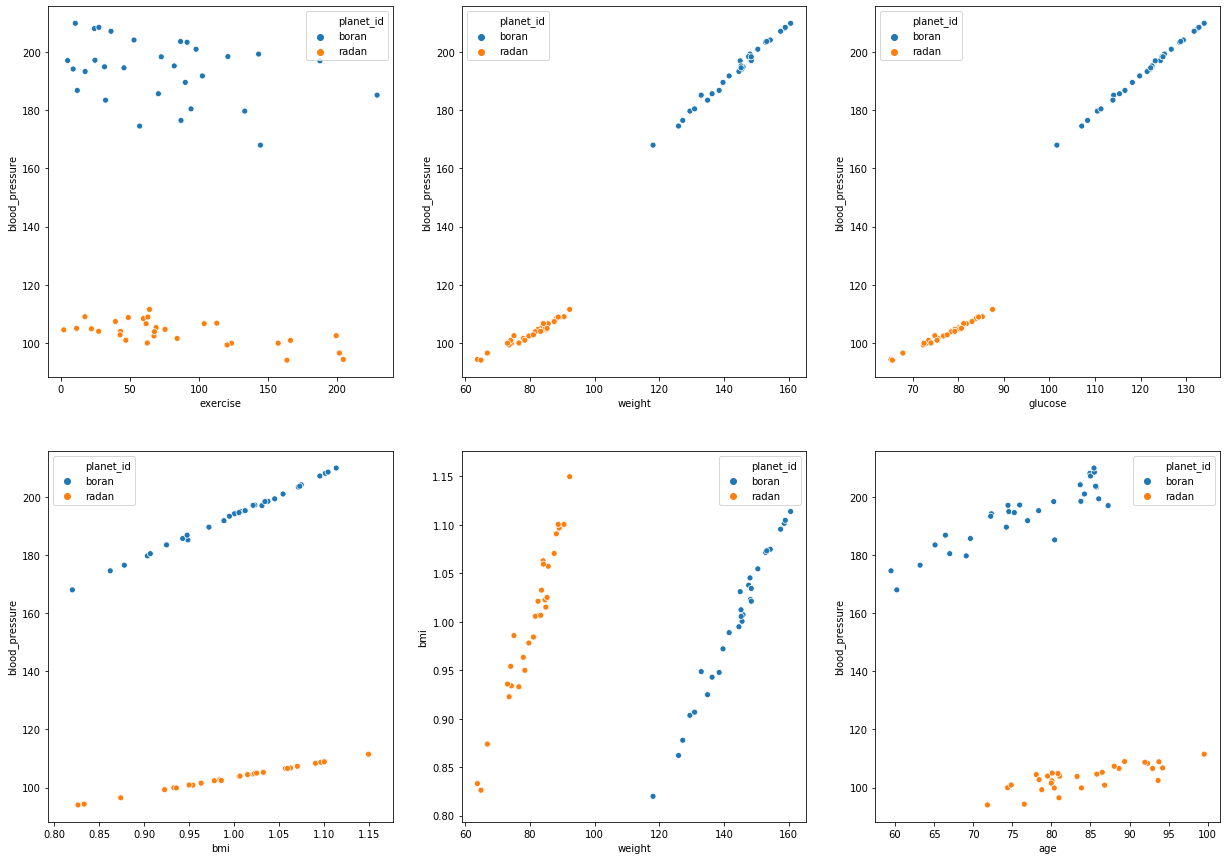

In [28]:
plt.figure(figsize=(21,15))
ax1 = plt.subplot(231)
sns.scatterplot(data=df, x="exercise", y="blood_pressure", hue="planet_id")
ax2 = plt.subplot(232)
sns.scatterplot(data=df, x="weight", y="blood_pressure", hue="planet_id")
ax3 = plt.subplot(233)
sns.scatterplot(data=df, x="glucose", y="blood_pressure", hue="planet_id")
ax4 = plt.subplot(234)
sns.scatterplot(data=df, x="bmi", y="blood_pressure", hue="planet_id")
ax5 = plt.subplot(236)
sns.scatterplot(data=df, x="age", y="blood_pressure", hue="planet_id")
ax6 = plt.subplot(235)
sns.scatterplot(data=df, x="weight", y="bmi", hue="planet_id")


# Conclusion
As Best Group Ever our conclusion is life is relatively viable on Boran and Radan. 
Creatures can expect a relatively long life with the average age of 74 for Boran(B) and 84 for Radan(R) with with 50% of creatures living past the median age of 76 on B and 62% living past median age of 82 on R. 


Best Group Ever recommends creatures re-locating to B and R maintain a healthy lifestyle pre-migration as there seems to be a positive correlation between BMI, Weight, Age and Glucose on Blood Pressure on B and R. However, no correlation to Exercise and Blood Pressure. Given this, it will be difficult to control blood pressure with exercise. There was not enough data to conclude what was negatively correlated to to Blood Pressure. 

As a means to control Blood Pressure levels, Best Group Ever recommends PHBCICI does not build an exercise facility, rather it relocates the funds designated to the facility into drug research controlling blood pressure levels if they would like to extend life expectancy and quality of life as reserach shows normal blood pressure levels as an important health and life expectancy indicator. 

In [52]:
#df.head(1)

In [51]:
#sns.pairplot(df.drop('patient_id', axis=1), hue="planet_id")

In [29]:
#X = df[['exercise', 'weight', 'glucose', 'bmi', 'age']]
#y = df['blood_pressure']

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
#print (X_train.shape, y_train.shape)
#print (X_test.shape, y_test.shape)

In [32]:
#linear_regressor = LinearRegression()
#linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#lm = LinearRegression()

In [34]:
#scores = cross_val_score(lm, X_train, y_train, cv = 5)   

#print(scores, np.mean(scores), np.std(scores))

[0.99999203 0.99998463 0.99998307 0.99998809 0.99998149] 0.9999858599529565 3.7793611359129684e-06


In [35]:
#predictions = cross_val_predict(lm, X_test, y_test, cv = 5)

In [36]:
#accuracy = metrics.r2_score(y_test, predictions)

In [50]:
#lm.fit(X_train, y_train)
#y_hat = lm.predict(X_test)      
#lm.score(X_test, y_test)